Para essa análise, utilizaremos bibliotecas, como Pandas, Matplotlib e NumPy.

Vamos criar um exemplo prático utilizando essas bibliotecas para analisar séries temporais.



/tmp/ipython-input-1794017544.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datas = pd.date_range(start='2020-01-01', periods=24, freq='M')


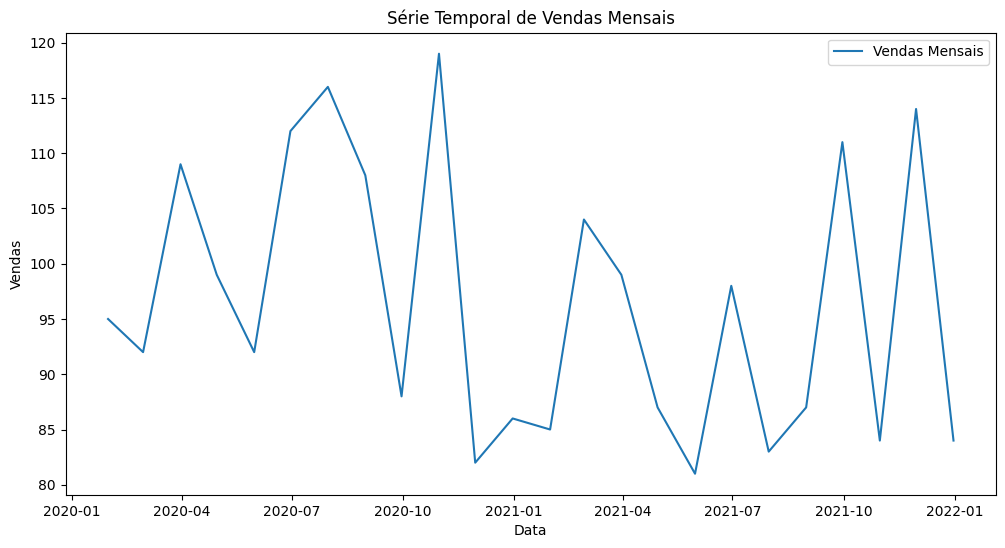

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configurando o ambiente para exibir gráficos (usado em notebooks como o Google Colab)
%matplotlib inline

# Gerando dados fictícios de vendas mensais
# Criando uma série temporal de 24 meses com valores entre 80 mil e 120 mil unidades
datas = pd.date_range(start='2020-01-01', periods=24, freq='M')
vendas = np.random.randint(80, 120, size=24)

# Criando o DataFrame com os dados simulados
dados = pd.DataFrame({'Data': datas, 'Vendas': vendas})

# Plotando a série temporal de vendas mensais
plt.figure(figsize=(12, 6))
plt.plot(dados['Data'], dados['Vendas'], label='Vendas Mensais')
plt.title('Série Temporal de Vendas Mensais')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.show()

- A média móvel reduz ruídos e flutuações pontuais nos dados.
- Ajuda a visualizar tendências gerais sem se perder em variações mensais.

**Insights gerados**
- Identificação de picos e quedas reais, ignorando variações aleatórias.
- Facilita decisões estratégicas como previsão de demanda ou planejamento de estoque


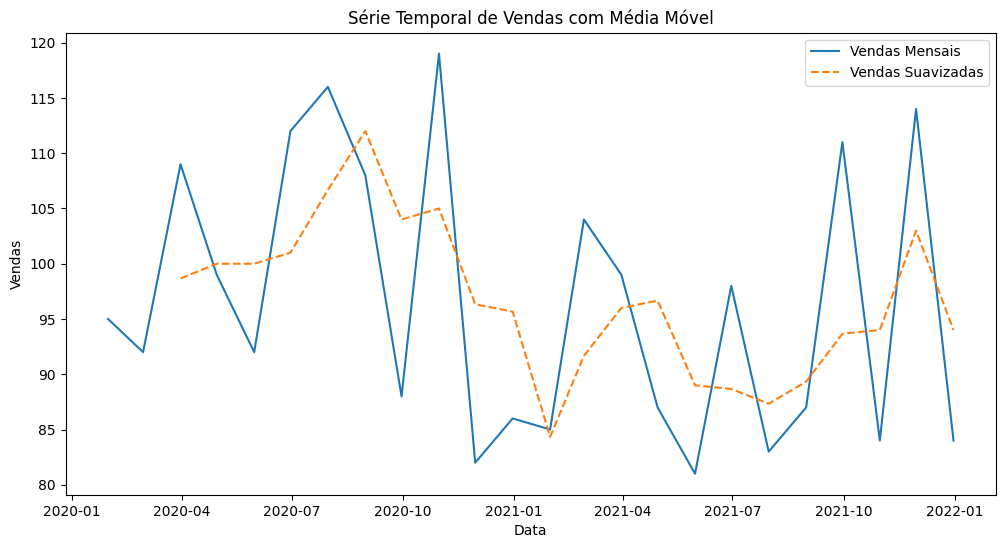

In [2]:
# Aplicando uma média móvel para suavizar a série temporal
dados['Vendas_Suavizadas'] = dados['Vendas'].rolling(window=3).mean()

# Plotando a série original e a suavizada
plt.figure(figsize=(12, 6))
plt.plot(dados['Data'], dados['Vendas'], label='Vendas Mensais')
plt.plot(dados['Data'], dados['Vendas_Suavizadas'], label='Vendas Suavizadas', linestyle='--')
plt.title('Série Temporal de Vendas com Média Móvel')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.show()

- A decomposição separa a série em tendência, sazonalidade e ruído.
- Permite entender comportamentos cíclicos e mudanças estruturais nos dados.


**Insights gerados**

- Tendência: mostra se as vendas estão crescendo ou diminuindo ao longo do tempo.
- Sazonalidade: revela padrões recorrentes (ex: aumento de vendas no fim do ano).
- Resíduos: ajudam a identificar eventos fora do padrão (ex: promoções, crises).


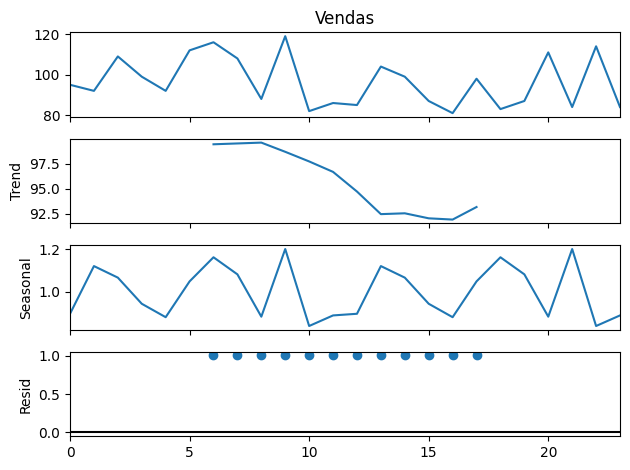

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompondo a série temporal com modelo multiplicativo
resultado = seasonal_decompose(dados['Vendas'], model='multiplicative', period=12)

# Plotando os componentes: tendência, sazonalidade e resíduos
resultado.plot()
plt.show()

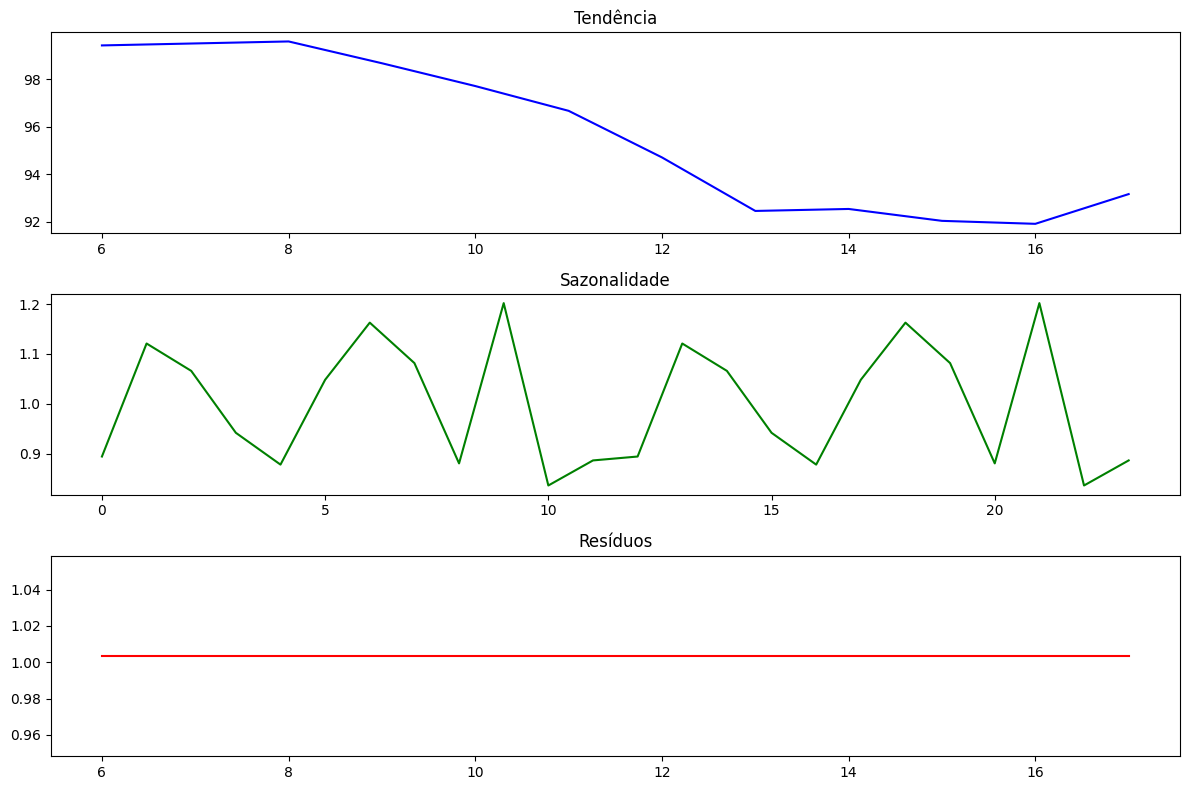

In [7]:
plt.figure(figsize=(12, 8))

# Tendência
plt.subplot(3, 1, 1)
plt.plot(resultado.trend, label='Tendência', color='blue')
plt.title('Tendência')

# Sazonalidade
plt.subplot(3, 1, 2)
plt.plot(resultado.seasonal, label='Sazonalidade', color='green')
plt.title('Sazonalidade')

# Resíduos
plt.subplot(3, 1, 3)
plt.plot(resultado.resid, label='Resíduos', color='red')
plt.title('Resíduos')

plt.tight_layout()
plt.show()

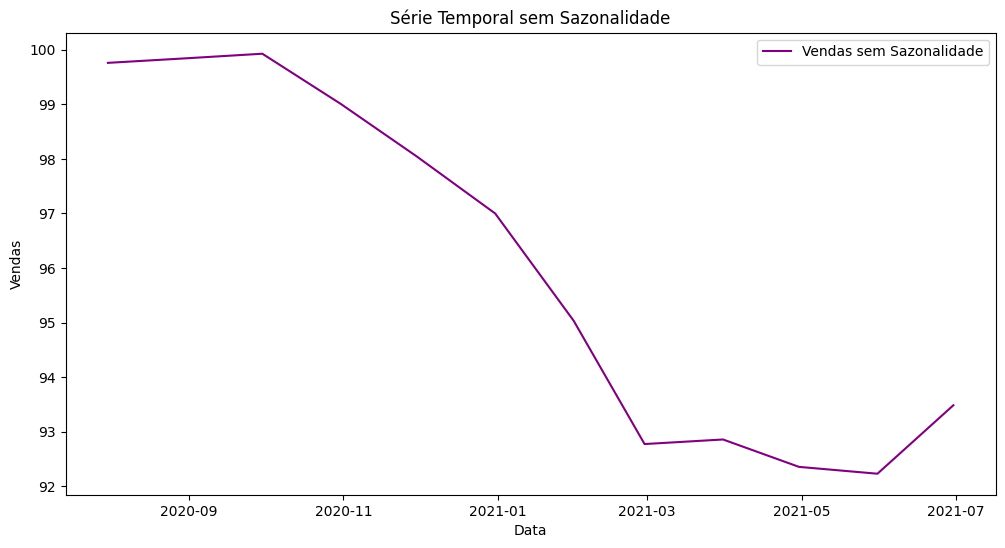

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompondo a série temporal
resultado = seasonal_decompose(dados['Vendas'], model='multiplicative', period=12)

# Reconstruindo a série sem sazonalidade (tendência × resíduos)
serie_sem_sazonalidade = resultado.trend * resultado.resid

# Plotando a série sem sazonalidade
plt.figure(figsize=(12, 6))
plt.plot(dados['Data'], serie_sem_sazonalidade, label='Vendas sem Sazonalidade', color='purple')
plt.title('Série Temporal sem Sazonalidade')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.show()